<a href="https://colab.research.google.com/github/100495802/G11.AA-495802-495702/blob/main/P1AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P1-AA: PREDICCIÓN DEL ABANDONO DE EMPLEADOS DE UNA EMPRESA
- Curso de Aprendizaje Automático 2024/25
- Grado en Ingeniería Informática - UC3M
- Alejandro López Sancho: 100495702
- Javier Rosales Lozano: 100495802

## 1. Introducción y carga de datos

### 1.1. Enunciado del proyecto

El siguiente notebook contiene toda la información y trabajo realizado acerca de la primera parte de la práctica inicial del curso de Aprendizaje Automático 2024/25. El objetivo de esta práctica es realizar la __construcción, medición y evaluación de un modelo que prediga un problema planteado como el número de abandonos dentro de una empresa en función de las características de sus trabajadores__.

En este primer archivo de Jupyter Notebook encontraremos todo el proceso de EDA (Exploratory Data Analysis), selección de imputers y scalers, ajuste de hiperparámetros, evaluación de modelos, obtención de la tasa de aprendizaje y resolución de las preguntas establecidas en el enunciado de la práctica.

### 1.2. Repositorio Github y Dataset Inicial

El siguiente enlace redirige al [repositorio Github](https://github.com/100495802/G11.AA-495802-495702.git) correspondiente al proyecto; los datos elegidos para la realización del proyecto corresponden con el estándar especificado para la realización del trabajo (suma de los dos últimos dígitos de uno de los NIAs del grupo de prácticas). En este caso, hemos elegido el NIA __100495702__, por lo que nuestro [dataset inicial](attrition_availabledata_02.csv.gz) corresponderá con el número _2_ del conjunto de datasets del Aula Global.

### 1.3. Carga de Datos

A continuación, nos disponemos a la __carga de este conjunto de datos__:

In [395]:
import pandas as pd
datos = pd.read_csv("attrition_availabledata_02.csv.gz", compression="gzip", sep=",")

### 1.4. Conversión de variables categóricas

Debido a que la variable de salida _Attrition_ es una variable categórica, esto no va a ser funcional cuando realicemos algunas metodologías más adelante (GridSearch en HPO), por lo que convertiremos estas a una codificación binaria.

In [396]:
datos['Attrition'] = datos['Attrition'].map({'Yes': 1, 'No': 0})

# 2. EDA Simplificado

Una vez cargado el dataset, nos disponemos a comentar y describir los distintos datos que existen en el dataset.

### 2.1. Análisis general del dataset

Vamos a investigar primeramente el tamaño del dataset; esto lo haremos con los atributos de la librería Pandas `.shape` y `.size`.

In [397]:
print(f"Tamaño del dataset: {datos.shape}")
print(f"Número total de elementos del dataset: {datos.size}")

Tamaño del dataset: (2940, 31)
Número total de elementos del dataset: 91140


Podemos observar que el tamaño del dataset es de __2940 filas (instancias) y 31 columnas (atributos)__. También identificamos el número de elementos del conjunto de datos.

Seguidamente, echaremos un vistazo rápido a los atributos que hay en la base de datos; usaremos el método `info()` para identificar las diferentes columnas del dataset, además del tipo de dato y el número de instancias no nulas que contiene.

In [398]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2940 non-null   float64
 1   absences                 2940 non-null   int64  
 2   JobInvolvement           2940 non-null   int64  
 3   PerformanceRating        2940 non-null   int64  
 4   EnvironmentSatisfaction  2927 non-null   float64
 5   JobSatisfaction          2925 non-null   float64
 6   WorkLifeBalance          2911 non-null   float64
 7   Age                      2940 non-null   int64  
 8   BusinessTravel           2940 non-null   object 
 9   Department               2940 non-null   object 
 10  DistanceFromHome         2940 non-null   int64  
 11  Education                2940 non-null   int64  
 12  EducationField           2940 non-null   object 
 13  EmployeeCount            2940 non-null   int64  
 14  EmployeeID              

En la salida podemos observar una tabla donde apreciamos el nombre del atirbuto, el número de instancias no vacías y el tipo de dato de ésta columna. Esto nos servirá para apreciar los tipos de datos que estamos analizando.

Podemos observar que algunos de ellos cumplen con todas sus filas con algún valor no nulo (N/A), mientras que __otras columnas no alcanzan el número total de filas obtenido anteriormente (2940)__.

Por otro lado, el tipo de datos nos hace preveer cuáles columnas representan __atributos categóricos__ (`object`) y cuáles __atributos numéricos__ (`int64`, `float64`).

Para un resumen más detallado, nos serviremos de otro método de Pandas: `.describe()`

In [399]:
datos.describe()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,...,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,2940.000000,2940.000000,2940.000000,2940.000000,2927.000000,2925.000000,2911.000000,2940.000000,2940.000000,2940.000000,...,2926.000000,2940.000000,2940.0,2940.000000,2935.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,7.322768,12.706803,2.728571,3.154422,2.723266,2.746325,2.760907,36.861224,9.305102,2.906463,...,2.664388,15.187075,8.0,0.785034,11.363884,2.798639,7.095578,2.227891,4.191156,0.161224
std,1.335600,5.533199,0.716167,0.361414,1.096170,1.104612,0.713539,9.286733,8.201638,1.023254,...,2.495153,3.661275,0.0,0.851343,7.897032,1.304166,6.161878,3.274101,3.627734,0.367800
min,5.416880,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,...,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.272786,8.000000,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,...,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,0.000000
50%,7.032627,13.000000,3.000000,3.000000,3.000000,3.000000,3.000000,35.000000,7.000000,3.000000,...,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,0.000000
75%,7.948416,17.000000,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,...,4.000000,18.000000,8.0,1.000000,16.000000,3.000000,10.000000,3.000000,7.000000,0.000000
max,10.937261,24.000000,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,...,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,1.000000


Ésta ejecución de código nos permite identificar algunas __métricas estadísticas__ acerca del conjunto de datos que abarcan los distintos atributos (como la media, la mediana, mínimos, máximos y rangos intercuartílicos). Esto de momento no nos servirá, pero quizás más adelante será útil.

Con los datos visualizados anteriormente en la ejecución de `.info()`, vamos a observar los valores de las variables más a fondo, haciendo hincapié en las distintas observaciones que se piden en la práctica.

### 2.2. Variables numéricas y categóricas; variables con alta cardinalidad

Empezamos distinguiendo los atributos que representan __valores categóricos__ de los que representan __valores numéricos__ (descartando la columna de la variable de salida, _Attrition_, la cual sabemos que es categórica):

In [400]:
numericas = datos.select_dtypes(include=['int64', 'float64']).columns.drop(['Attrition'])
print(numericas)

Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [401]:
categoricas = datos.select_dtypes(include=["object"]).columns
print(categoricas)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18'],
      dtype='object')


A continuación, de las __variables categóricas__, vamos a identificar aquellas variables con una __alta cardinalidad__ en sus valores:

In [402]:
for columna in datos.select_dtypes(include=["object"]).columns:
    print(columna)
    print(datos[columna].unique())

BusinessTravel
['Travel_Frequently' 'Non-Travel' 'Travel_Rarely']
Department
['Research & Development' 'Sales' 'Human Resources']
EducationField
['Life Sciences' 'Medical' 'Other' 'Technical Degree' 'Marketing'
 'Human Resources']
Gender
['Male' 'Female']
JobRole
['Laboratory Technician' 'Healthcare Representative' 'Research Scientist'
 'Sales Representative' 'Manufacturing Director' 'Sales Executive'
 'Research Director' 'Human Resources' 'Manager']
MaritalStatus
['Married' 'Divorced' 'Single']
Over18
['Y']


Analizando la salida de esta ejecución, podemos observar qué variables categóricas presentan elevada cardinalidad. __En este proyecto consideraremos con cardinalidad elevada un atributo con rango de posibles opciones mayor de 4__.

En este caso, las columnas con alta cardinalidad son _EducationField_ y _JobRole_.

### 2.3. Variables nulas

Para el preprocesado de datos, es importante determinar qué instancias contienen __valores nulos__, y el número de instancias de este tipo en cada columna. Esto lo comprobamos con el método de Pandas `.isnull()`:

In [403]:
nulos = datos.isnull().sum()
nulos[nulos > 0]

EnvironmentSatisfaction    13
JobSatisfaction            15
WorkLifeBalance            29
NumCompaniesWorked         14
TotalWorkingYears           5
dtype: int64

Como podemos observar, en el dataset se aprecian __cinco columnas con valores nulos__ en sus filas: _EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance, NumCompaniesWorked, TotalWorkingYears_. Teniendo en cuenta que en total hay 2940 filas en la base de datos, se pueden calcular fácilmente la media de datos vacíos por columna.

Si recordamos de qué tipo era cada variable, podemos observar que __todas estas columnas corresponden con variables numéricas__, y podemos ir pensando ya en posibilidades para trabajar con estos valores vacíos.

### 2.4. Variables de identificación (ID)

Una vez analizado todo lo anterior, empezamos a buscar qué posibles columnas actúan como identificadores en la base de datos. A simple vista, una posible opción sería _EmployeeID_, aunque es mejor comprobarlo con la llamada al método `.nunique()`:

In [404]:
for columna in datos.columns:
    if datos[columna].nunique() == len(datos):
        print(f"La columna '{columna}' es un posible identificador único.")

La columna 'EmployeeID' es un posible identificador único.


In [405]:
datos.drop(columns="EmployeeID")

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,10.060048,6,3,4,2.0,4.0,1.0,31,Travel_Frequently,Research & Development,...,Y,23,8,1,7.0,5,2,2,2,1
1,9.437671,2,2,3,3.0,4.0,3.0,33,Non-Travel,Research & Development,...,Y,13,8,0,7.0,6,6,1,2,0
2,7.900932,20,3,4,3.0,4.0,3.0,35,Travel_Rarely,Research & Development,...,Y,22,8,1,10.0,4,10,7,7,1
3,7.193853,19,4,3,4.0,2.0,3.0,28,Travel_Rarely,Research & Development,...,Y,15,8,0,1.0,1,1,0,0,0
4,6.979201,8,3,3,2.0,4.0,2.0,31,Travel_Rarely,Research & Development,...,Y,12,8,1,10.0,2,8,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,9.400915,3,2,3,4.0,NaN,3.0,42,Travel_Rarely,Sales,...,Y,14,8,1,10.0,2,9,7,8,0
2936,6.934386,9,2,3,3.0,1.0,2.0,49,Travel_Rarely,Research & Development,...,Y,11,8,1,16.0,3,15,5,11,0
2937,9.106920,15,3,3,2.0,4.0,2.0,36,Travel_Rarely,Sales,...,Y,13,8,0,18.0,2,18,4,11,0
2938,6.532645,6,4,3,1.0,3.0,2.0,30,Travel_Rarely,Sales,...,Y,16,8,1,5.0,2,5,0,4,0


Nuestras sospechas han resultado ser ciertas, y es que es el único atributo cuyos valores son únicos, y no coinciden dos o más instancias con el mismo valor en esta columna. Más adelante decidiremos qué hacer con esta columna.

### 2.5. ¿Problema desbalanceado?

Con el planteamiento completo del enunciado se puede intuir que estamos ante un __problema de clasificación__. Además, la variable _Attrition_ es la que determinará si un empleado es propenso a abandonar la empresa en función del resto de columnas.

Sin embargo, todavía __no podemos comprobar si se trata de un problema de clasificación desbalanceado__, ya que no hemos hecho un conteo de los valores de dicha columna. Este paso es importante, ya que marcará la manera en la que realizaremos las particiones para entrenar, validar y evaluar el modelo.

Para averiguarlo, usaremos el método `.value_counts()`:

In [406]:
datos["Attrition"].value_counts()

Attrition
0    2466
1     474
Name: count, dtype: int64

La salida de la ejecución nos muestra el conteo de datos de dicha columna, lo que demuestra que __se trata de un problema desbalanceado__ hacia el valor "no", siendo más del 80% de las clasificaciones de este tipo.

Esto va a influir en la manera en la que creamos los modelos de aprendizaje, ya que deberemos establecer los pesos balanceados con `class_weight=balanced`; de esta manera, se dará prioridad a las instancias de la clase minoritaria.

## 3. Metodología de trabajo: Decidir cómo se va a realizar la evaluación

Una vez terminada la parte de análisis del conjunto de datos, podemos concluir en dos cosas:

1. El problema es de clasificación, desbalanceado, con variables categóricas y numéricas, y algunas instancias contienen datos vacíos.

2. Siendo el 80% de la muestra la que decide no abandonar, por el momento, la empresa puede estar tranquila.

Con los datos ya analizados, procedemos a especificar la realización de la práctica. En este apartado vamos a comentar __cómo vamos a evaluar nuestro modelo__.

### 3.1. Planificación del entrenamiento

- __División de los datos:__

  Para realizar la evaluación de nuestro modelo, lo primero que tenemos que hacer es dividir el conjunto de datos en dos particiones de train y test. Usaremos __Holdout__ para invertir 2/3 de los datos para la parte de entrenamiento del modelo y el resto para evaluar el modelo final del entrenamiento.

- __Preprocesado de datos:__

  Para empezar con la fase de entrenamiento, primero deberemos ajustar unas métricas relacionadas con el dataset. Deberemos medir qué método de __imputación__ y __escalado__ de atributos genera un mejor rendimiento de los datos. Para esta medición, usaremos KNN con los hiperparámetros por defecto, y modificaremos el escalado usando varios formatos (_Standard, MinMax, Robust_) y también el tratado de datos vacios o imputación de datos, usando otras métricas (_Media, Mediana_, al tratarse de atributos numéricos). Por último, en todos los casos usaremos la metodología de evaluación de modelos __3-Fold con crossvalidation__. Con todo esto buscamos obtener el Escaler-Imputer que de el mejor rendimiento de la partición de entrenamiento.

- __Creación de Modelos y Ajuste de hyperparametro HPO:__

  Una vez hecho lo anterior, comenzamos la búsqueda del mejor modelo; se construirán una serie de modelos basandonos en las metodologías aprendidas en clase (KNN, Árboles de Decisión, Modelos Lineales y SVMs) mientras realizamos el __ajuste de hiperparámetros__ (HPO), y elegiremos el modelo que mejor se ajuste a los datos, procurando evitar cualquier data-leakage y overfitting/underfitting.

- __Evaluación del modelo final de entrenamiento:__

  Cuando hayamos encontrado la mejor alternativa usaremos el conjunto de test anteriormente apartado para obtener una __estimación y rendimiento a futuro del modelo__. Esto es lo que se conoce como la evaluación del modelo

### 3.2. Entrenamiento y evaluación del modelo final

Los pasos anteriores en conjunto nos dirigen al entrenamiento del modelo final, el cual se entrena con el dataset completo (entrenamiento + test) y evaluaremos realizando predicciones con un conjunto de datos de competición aparte.

Toda esta implementación se realiza en el [segundo Jupyter Notebook](enlacealsiguiente) a entregar con la práctica.

## 4. Métodos Básicos: KNN y TREES; imputación, escalado y ajuste de hiperparámetros

Como hemos establecido anteriormente, el primer paso es realizar el escalado/imputación de los datos, de manera que sea el modelo el que se ajuste a éstos. Para ello, es necesario la importación de las siguientes librerías de SkLearn:

In [407]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler, StandardScaler
import time

### 4.1. División de los datos: particiones de entrenamiento y test

Para establecer la división de los datos haremos uso de la función `train_test_split()`,  en la que especificaremos la metodología __Holdout__ que divide las particiones de entrenamiento y test en una proporción (2/3, 1/3).

También inicializaremos el atributo _random_state_ con un valor predefinido, ya que esto garantiza que se mantenga el mismo conjunto de datos de partición de entrenamiento y de test en todas las ejecuciones. En el caso de inicializarlo a ` None`, estaríamos dejando al azar el entrenamiento del modelo, ya que hay algunas métricas como en KNN que no se basan en estadísticas globales de los datos, y esto puede variar el resultado cada vez que ejecutemos el código.

El valor elegido será `random_state=42` (número aleatorio).

Una vez especificado esto, se procede a la partición de los datos.

In [408]:
X = datos.drop("Attrition", axis=1)
y = datos["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

### 4.2. Escalado e imputación de la partición de entrenamiento; creación del preprocesador

Una vez divididos los datos, buscaremos el modelo que mejor se adapte a la partición de entrenamiento según el tipo de imputación y escalado de datos. Para los escaladores usaremos los tres escaladores estudiados en clase para KNN: __MinMax (to 0-1 range), Estandarización y RobustScaler__; mientras que para los imputadores usaremos los especificados en el enunciado: __la media y la mediana__ de las variables de la misma instancia (imputación univariante).

También usaremos como clasificador KNN y como métrica para la puntuación de cada imputer/scaler __balanced accuracy__:

In [409]:
# Lista de escaladores e imputadores
Scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
Imputers = [SimpleImputer(strategy="mean"), SimpleImputer(strategy="median")]

# Variables para almacenar el mejor modelo y su puntuación
mejor_scaler = None
mejor_imputer = None
mejor_score = 0

# Defiinimos el transformer para columnas categóricas
categorical_transformer = Pipeline(steps=[
  ("encoder", OneHotEncoder(handle_unknown="ignore"))
  ])

# Iteramos sobre los escaladores
for scaler in Scalers:

  # Iteramos sobre los imputadores
  for imputer in Imputers:

    # Pipeline para las columnas numéricas
    numerical_transformer = Pipeline(steps=[
      ("imputer", imputer), ("scaler", scaler)
      ])

    # Preprocesador combinado
    preprocessor = ColumnTransformer(transformers=[
      ("num", numerical_transformer, numericas),
      ("cat", categorical_transformer, categoricas)
      ])

    # Pipeline completo con clasificador (se utiliza KNN para clasificar)
    pipeline = Pipeline(steps=[
      ("preprocessor", preprocessor),
      ("classifier", KNeighborsClassifier())
      ])

    # Evaluación del modelo con 3-fold cross-validation (se utiliza balanced_accuracy como métrica)
    score = cross_val_score(pipeline, X_train, y_train,
                            cv=3, scoring="balanced_accuracy").mean()

    # Comparamos con el mejor modelo
    if score > mejor_score:
      mejor_score = score
      mejor_scaler = scaler
      mejor_imputer = imputer

    # Imprimimos los resultados de cada combinación
    print(f"Scaler: {scaler}, Imputer: {imputer}, Score: {score}")

# Obtenemos el mejor scaler/imputer y su score
print(f"\nMejor Scaler: {mejor_scaler}, Mejor Imputer: {mejor_imputer}, Mejor Score: {mejor_score}")

Scaler: StandardScaler(), Imputer: SimpleImputer(), Score: 0.5761237407807159
Scaler: StandardScaler(), Imputer: SimpleImputer(strategy='median'), Score: 0.5764301133297356
Scaler: MinMaxScaler(), Imputer: SimpleImputer(), Score: 0.573666014570966
Scaler: MinMaxScaler(), Imputer: SimpleImputer(strategy='median'), Score: 0.573666014570966
Scaler: RobustScaler(), Imputer: SimpleImputer(), Score: 0.5883600917431192
Scaler: RobustScaler(), Imputer: SimpleImputer(strategy='median'), Score: 0.5834665632307968

Mejor Scaler: RobustScaler(), Mejor Imputer: SimpleImputer(), Mejor Score: 0.5883600917431192


Observando los datos podemos concluir que el mejor método de escalado es `RobustScaler()`, el cual es particularmente útil cuando existen valores atípicos en los datos, ya que transforma los atributos usando la mediana y el rango intercuartílico; mientras que el mejor método de imputación (univariante) es `SimpleImputer(strategy="mean")`, el cual reemplaza los valores faltantes con la media de cada atributo. Esta estrategia es muy común y sobretodo adecuada cuando los datos son aproximadamente simétricos.

Estos valores quedan reservados en las variables locales `mejor_scaler` y `mejor_imputer`

A continuación, definiremos un __preprocesador__, que usaremos en los distintos modelos a lo largo del cuaderno, con los valores obtenidos:

In [410]:
# Definimos el codificador de variables categóricas
categorical_transformer = Pipeline(steps=[
       ("encoder", OneHotEncoder(handle_unknown="ignore"))
       ])

# Definimos el mejor escalador e imputador obtenidos anteriormente
numerical_transformer = Pipeline(steps=[
       ("imputer", mejor_imputer),
       ("scaler", mejor_scaler)
       ])

# Preprocesador combinado para columnas numéricas y categóricas
preprocesador = ColumnTransformer(transformers=[
       ("num", numerical_transformer, numericas),
       ("cat", categorical_transformer, categoricas)
       ])

Este preprocesador queda almacenado en la variable `preprocesador`.

Finalmente, utilizaremos un diccionario que almacenará el modelo de clasificación junto con los resultados obtenidos en puntuación y tiempo de ejecución. Este diccionario se declarará en la variable `resultados`:

In [411]:
# Creamos un diccionario para almacenar los resultados de los modelos
resultados = {}

### 4.3. Modelos iniciales con hiperparámetros por defecto

Una vez tenemos los métodos de escalado y de imputación seleccionados, junto con el preprocesador de los datos preparado, podemos pasar a la siguiente fase. Antes de realizar el ajuste de hiperparámetros, primeramente buscaremos los modelos de KNN y Árboles de Decisión con los hiperparámetros por defecto:

In [412]:
# Definimos los clasificadores KNN y DecisionTreeClassifier
clasificadores = [KNeighborsClassifier(), DecisionTreeClassifier(random_state=42)]

# Iteramos sobre los clasificadores
for clasificador in clasificadores:
    
    # Configuramos el clasificador para que use pesos balanceados si es un árbol de decisión
    if isinstance(clasificador, DecisionTreeClassifier):
           clasificador.set_params(class_weight="balanced")

    # Pipeline completo con clasificador
    pipeline = Pipeline(steps=[
           ("preprocessor", preprocesador),
           ("classifier", clasificador)
           ])

    # Medimos el tiempo de entrenamiento del modelo
    start_time = time.time()
    scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='balanced_accuracy')
    end_time = time.time()

    # Imprimimos los resultados
    print("Modelo", clasificador.__class__.__name__)
    print("Puntuación de validación cruzada:", scores.mean())
    print("Tiempo de ejecución:", end_time - start_time, "segundos\n")

    # Almacenamos los resultados en el diccionario
    resultados[clasificador.__class__.__name__] = {
       "modelo": clasificador,
       "puntuacion": scores.mean(),
       "tiempo_ejecucion": end_time - start_time,
       "hiperparametros": None
       }


Modelo KNeighborsClassifier
Puntuación de validación cruzada: 0.5883600917431192
Tiempo de ejecución: 0.17511415481567383 segundos

Modelo DecisionTreeClassifier
Puntuación de validación cruzada: 0.7739504632128081
Tiempo de ejecución: 0.2226874828338623 segundos



A priori, el modelo KNN es considerablemente menos eficiente que los árboles de decisión; y la diferencia de coste computacional no es muy grande, por lo que no es realmente útil comparar por esta métrica todavía.

### 4.4. Ajuste de hiperparámetros (HPO)

A continuación, usaremos la metodología `GridSearch()` para encontrar el mejor ajuste de hiperparámetros para cada uno de los dos métodos.

Consideraremos los siguientes hiperparámetros para el modelo __KNN__:
- __Grado de clasificación (_k_)__: representa el número de datos de entrenamiento más cercanos a la instancia a evaluar que se consideran para determinar la predicción del modelo
- __Métricas de distancia entre instancias vecinas__: distancia euclídea, distancia de Manhattan y distancia de Minkowski

Por otro lado, los hiperparámetros a medir para los __arboles de decisión__ son los siguientes:
- __Profundidad máxima del árbol (_max_depth_)__: es el máximo de profundidad que se permite para la creación del árbol. Esto influye en las instancias agrupadas en cada nodo hoja.
- __Número mínimo de instancias (_min_samples_split_)__: se condiciona el número mínimo de instancias para poder realizar una patición de un nodo intermedio.
- __Criterio de impureza__: se varía el cálculo para determinar qué atributos influyen más en la clasificación (_entropía_ e _impureza de Gini_).

Podríamos añadir muchos más hiperparámetros que harían este proceso mucho más efectivo, pero también buscamos reducir el tiempo de ejecución. Por lo tanto, nos serviremos de los hiperparámetros fundamentales que estimen un modelo con un mayor rendimiento.

Además, para evitar que se ejecute durante más tiempo, repartiremos el trabajo entre todos los kernels de la máquina con `n_jobs=-1`.

In [413]:
# Iteramos sobre los clasificadores
for clasificador in clasificadores:

    # Definimos una pipeline con el preprocesador y el clasificador
    pipeline = Pipeline(steps=[
           ("preprocessor", preprocesador),
           ("classifier", clasificador)
           ])

    # Definimos la rejilla de hiperparámetros para cada clasificador
    if isinstance(clasificador, KNeighborsClassifier):
            param_grid = {
                'classifier__n_neighbors': [3, 5, 7, 9, 11],
                'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
            }
    elif isinstance(clasificador, DecisionTreeClassifier):
            # Configuramos el clasificador para que use pesos balanceados si es un árbol de decisión
            clasificador.set_params(class_weight="balanced")
            param_grid = {
                'classifier__max_depth': [5, 10, 15, None],
                'classifier__min_samples_split': [2, 5, 10],
                'classifier__criterion': ['gini', 'entropy'],
            }

    # Entrenamos el modelo con GridSearchCV para encontrar los mejores hiperparámetros
    grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring='balanced_accuracy')

    # Medimos el tiempo del entrenamiento del modelo
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time()

    # Mostrar los mejores hiperparámetros
    print("Modelo", clasificador.__class__.__name__, "con HPO")
    print("Mejores parámetros:", grid_search.best_params_)
    print("Mejor puntuación:", grid_search.best_score_)
    print("Tiempo de ejecución:", end_time - start_time, "segundos\n")
    
    # Guardamos el mejor modelo en la instancia del diccionario con HPO
    resultados[clasificador.__class__.__name__+"_HPO"] = {
        "modelo": clasificador,
        "puntuacion": grid_search.best_score_,
        "tiempo_ejecucion": end_time - start_time,
        "hiperparametros": grid_search.best_params_
    }

Modelo KNeighborsClassifier con HPO
Mejores parámetros: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 3}
Mejor puntuación: 0.6595936769203093
Tiempo de ejecución: 6.408314943313599 segundos

Modelo DecisionTreeClassifier con HPO
Mejores parámetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 15, 'classifier__min_samples_split': 5}
Mejor puntuación: 0.782812218924267
Tiempo de ejecución: 1.7895655632019043 segundos



Podemos observar las dos mejores combinaciones de hiperparámetros respecto a cada modelo:

- En KNN, elegir las tres instancias más cercanas según la distancia euclídea resulta ser más efectivo que cualquier otra combinación; sin embargo, el tiempo de ejecución relativamente alto. Esto puede deberse a datos ruidosos, y a que la fase clave del procedimiento viene en la predicción (ya que en KNN, el entrenamiento son los propios datos del modelo, por eso es un algoritmo "perezoso").
- Por otro lado, para árboles de decisión, medir la pureza de un nodo con la impureza de Gini parece ser más efectivo que el cálculo de la entropía; se establece a 15 la profundidad máxima del árbol (lo que significa que existen muchas particiones/ramas), y a 5 el número mínimo de instancias de un nodo hoja.

En cualquier circunstancia, se ve claro que __el clasificador de árboles de regresión es más efectivo y más eficiente que el clasificador KNN__.

### 4.5. Modelo Dummy

El __modelo Dummy__ es el modelo que clasifica todas las instancias a la clase mayoritaria, lo cual es inefectivo para nuestro problema, ya que causará un modelo con muy baja tasa de acierto.

Sin embargo, saber las métricas de este modelo puede ayudarnos a comprobar que los modelos creados anteriormente sean efectivos. Los modelos obtenidos anteriormente se considerarán como válidos si superan la tasa de acierto de este modelo.

En este caso, no se realiza ajuste de hiperparámetros, ya que la creación de este modelo es meramente orientativa:

In [414]:
# Definimos el clasificador DummyClassifier
dummy_clf = DummyClassifier(strategy='most_frequent')

# Medimos el tiempo del entrenamiento del modelo
start_time = time.time()
score = cross_val_score(dummy_clf, X_train, y_train, cv=3, scoring='balanced_accuracy').mean()
end_time = time.time()

# Mostramos los resultadosd
print("Modelo DummyClassifier")
print("Mejor puntuación:", score)
print("Tiempo de ejecución:", end_time - start_time, "segundos\n")

# Guardamos el modelo en el diccionario
resultados[dummy_clf.__class__.__name__] = {
    "modelo": dummy_clf,
    "puntuacion": score,
    "tiempo_ejecucion": end_time - start_time,
    "hiperparametros": None
}

Modelo DummyClassifier
Mejor puntuación: 0.5
Tiempo de ejecución: 0.02880859375 segundos



Como es obvio, el modelo Dummy obtendrá una __tasa de aciertos del 50%__, lo cual es inferior a la puntuación obtenida en los modelos anteriores. Esto nos confirma que los modelos son correctos.


### 4.6. Comparativa de modelos

A continuación, mostramos el siguiente balance de resultados:

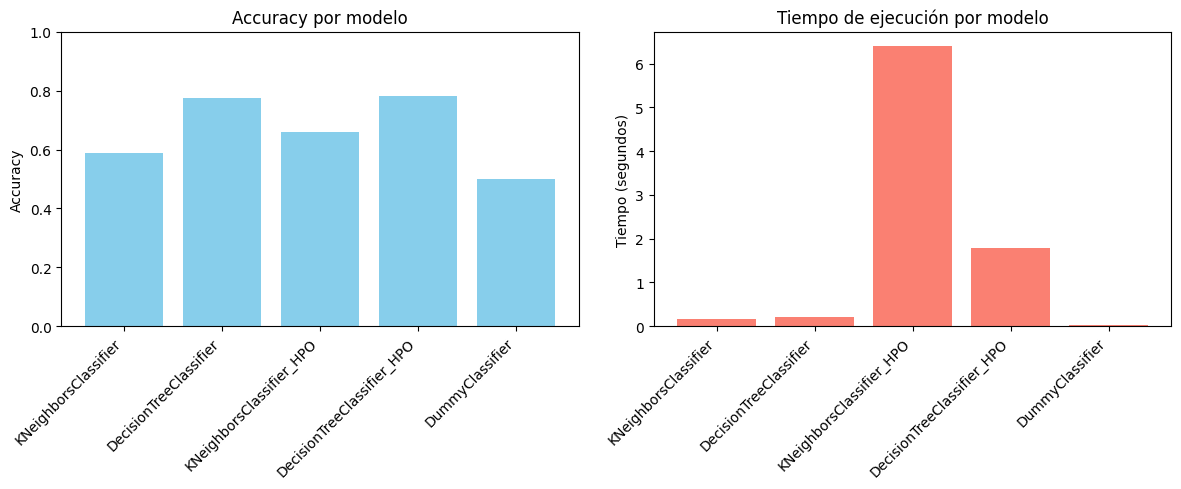

In [415]:
import matplotlib.pyplot as plt

# Listamos los modelos creados
modelos = list(resultados.keys())

# Extraemos las puntuaciones y tiempos de ejecución de cada modelo
accuracies = [resultados[modelo]["puntuacion"] for modelo in modelos]
tiempos = [resultados[modelo]["tiempo_ejecucion"] for modelo in modelos]

# Creamos dos plots: uno para la accuracy y otro para el tiempo de ejecución
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot de scores (accuracies)
axes[0].bar(modelos, accuracies, color='skyblue')
axes[0].set_title('Accuracy por modelo')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0, 1)

# Plot de tiempo de ejecución
axes[1].bar(modelos, tiempos, color='salmon')
axes[1].set_title('Tiempo de ejecución por modelo')
axes[1].set_ylabel('Tiempo (segundos)')

# Ajustamos las etiquetas de los modelos
for ax in axes:
    ax.set_xticks(range(len(modelos)))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Mostramos los plots
plt.tight_layout()
plt.show()

## 5. Avanzados: Modelos lineales y SVMs

A continuación, una vez evaluados los modelos simples (KNN y árboles), podemos pasar a la siguiente parte del entrenamiento. Avanzamos a modelos más complejos para nuestro dataset: __modelos lineales de regresión y máquinas de vectores de soporte (SVMs)__.

Continuaremos con nuestra metodología de creación de modelos con los parámetros por omisión antes de pasar al ajuste de hiperparámetros, usando los valores de escalado e imputación obtenidos en el apartado anterior (y, por supuesto, midiendo el tiempo de ejeución y su puntuación obtenida).

A continuación, establecemos todas las librerías que se van a utilizar en este apartado:

In [416]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### 5.1. Modelos lineales de clasificación (Regresión Logística) y HPO

Para empezar, mediremos nuestro modelo usando un modelo de regresión logística, el cual es un modelo lineal adaptado a problemas de clasificación. Para ello, usaremos el modelo `LogisticRegression()`

In [417]:
# Definimos el clasificador LogisticRegression
logistic_clf = LogisticRegression(random_state=42)

# Balanceamos los pesos
logistic_clf.set_params(class_weight="balanced")

# Definimos la pipeline con el preprocesador y el clasificador
pipeline = Pipeline(steps=[
           ("preprocessor", preprocesador),
           ("classifier", logistic_clf)
           ])

# Medimos el tiempo del entrenamiento del modelo
start_time = time.time()
score = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='balanced_accuracy').mean()
end_time = time.time()

# Mostramos los resultados
print("Modelo LogisticRegression")
print("Mejor puntuación:", score)
print("Tiempo de ejecución:", end_time - start_time, "segundos\n")

# Guardamos el modelo en el diccionario
resultados[logistic_clf.__class__.__name__] = {
    "modelo": logistic_clf,
    "puntuacion": score,
    "tiempo_ejecucion": end_time - start_time,
    "hiperparametros": None
}

Modelo LogisticRegression
Mejor puntuación: 0.7392769607843137
Tiempo de ejecución: 0.27269625663757324 segundos



A continuación, mostramos el mismo tipo de modelo aplicando la __regularización Lasso (L1)__, la cual utiliza una función de penalización en valor absoluto de los valores absolutos de los coeficientes, lo que puede provocar que algunos se vean reducidos exactamente a cero. Si se da el caso, significará que algunas variables no contribuyen a la predicción.

Para ello, usaremos el mismo objeto `LogisticRegression()`, añadiendo como atributos la penalización Lasso `penalty='l1'`, y el solver `'liblinear'`.

In [418]:
# Definimos el clasificador LogisticRegression con regularización Lasso (L1)
# Usamos el solver 'liblinear' para la penalización L1
logistic_Lasso_clf = LogisticRegression(random_state=42, penalty='l1', solver='liblinear')

# Balanceamos los pesos
logistic_Lasso_clf.set_params(class_weight="balanced")

# Definimos el pipeline con el preprocesador y el clasificador
pipeline = Pipeline(steps=[
           ("preprocessor", preprocesador),
           ("classifier", logistic_Lasso_clf)
           ])

# Medimos el tiempo del entrenamiento del modelo
start_time = time.time()
score = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='balanced_accuracy').mean()
end_time = time.time()

# Mostramos los resultados
print("Modelo LogisticRegression con reg. Lasso")
print("Mejor puntuación:", score)
print("Tiempo de ejecución:", end_time - start_time, "segundos")

# Guardamos el modelo en el diccionario
resultados[logistic_Lasso_clf.__class__.__name__+"_Lasso"] = {
    "modelo": logistic_Lasso_clf,
    "puntuacion": score,
    "tiempo_ejecucion": end_time - start_time,
    "hiperparametros": None
}

Modelo LogisticRegression con reg. Lasso
Mejor puntuación: 0.7365218564490016
Tiempo de ejecución: 0.21089506149291992 segundos


Podemos apreciar que el modelo lineal se ve afectado negativamente con la regularización implicada. Esto puede deberse a que se realiza una __regularización excesiva de los datos__, convirtiendo el modelo a una versión más simplista que no utiliza información relevante que el modelo anterior sí usa. Es decir, el modelo de clasificación lineal realiza un mejor desempeño sin regularización Lasso que con ella.

Seguidamente, nos disponemos a realiza el __ajuste de hiperparámetros__ de los dos modelos creados anteriormente (modelos lineales con y sin regularización Lasso). Ajustaremos los siguientes __hiperparámetros__:

- __Función de coste (_C_)__: controla la regularización aplicada al modelo, y su principal objetivo es prevenir el sobreajuste de los datos de entrenamiento.
- __Número máximo de iteraciones__: controla el número máximo de iteraciones que el algoritmo de optimización (__descenso de gradiente__) realizará para encontrar los coeficientes óptimos del modelo.

In [419]:
# Definimos el clasificador LogisticRegression
logistic_clf = LogisticRegression(random_state=42)

# Balanceamos los pesos
logistic_clf.set_params(class_weight="balanced")

# Definimos el pipeline con el preprocesador y el clasificador
pipeline = Pipeline(steps=[
           ("preprocessor", preprocesador),
           ("classifier", logistic_clf)
           ])

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__max_iter': [100, 200, 300]
}

# Hacemos búsqueda con rejilla para buscar los mejores hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring='balanced_accuracy')

# Medimos el tiempo del entrenamiento del modelo
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Mostramos los resultados
print("Modelo LogisticRegression con HPO")
print("Mejor puntuación:", grid_search.best_score_)
print("Mejores parámetros:", grid_search.best_params_)
print("Tiempo de ejecución:", end_time - start_time, "segundos\n")

# Guardamos el modelo en el diccionario
resultados[logistic_clf.__class__.__name__+"_HPO"] = {
    "modelo": grid_search.best_estimator_,
    "puntuacion": grid_search.best_score_,
    "tiempo_ejecucion": end_time - start_time,
    "hiperparametros": grid_search.best_params_
}

Modelo LogisticRegression con HPO
Mejor puntuación: 0.7417251304191401
Mejores parámetros: {'classifier__C': 100, 'classifier__max_iter': 100}
Tiempo de ejecución: 0.9222533702850342 segundos



El valor del hiperparámetro _C_ (grande) implica que se realice menos regularización, lo que significa que el modelo se ajusta más a los datos para evitar el sobreajuste. Por otro lado, el número máximo de iteraciones para que el algoritmo de optimización converja es suficiente para que se considere una solución óptima.

Continuamos con el ajuste de hiperparámetros del modelo aplicando regularización L1:

In [420]:
# Definimos el clasificador LogisticRegression
logistic_Lasso_clf = LogisticRegression(random_state=42, penalty='l1', solver='liblinear')

# Balanceamos los pesos
logistic_Lasso_clf.set_params(class_weight="balanced")

pipeline = Pipeline(steps=[
           ("preprocessor", preprocesador),
           ("classifier", logistic_Lasso_clf)
           ])

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring='balanced_accuracy')

# Medimos el tiempo del entrenamiento del modelo
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Mostramos los resultados
print("Modelo LogisticRegression con reg. Lasso y HPO")
print("Mejor puntuación:", grid_search.best_score_)
print("Mejores parámetros:", grid_search.best_params_)
print("Tiempo de ejecución:", end_time - start_time, "segundos\n")

# Guardamos el modelo en el diccionario
resultados[logistic_Lasso_clf.__class__.__name__+"_Lasso_HPO"] = {
    "modelo": grid_search.best_estimator_,
    "puntuacion": grid_search.best_score_,
    "tiempo_ejecucion": end_time - start_time,
    "hiperparametros": grid_search.best_params_
}

Modelo LogisticRegression con reg. Lasso y HPO
Mejor puntuación: 0.7432541824069077
Mejores parámetros: {'classifier__C': 100, 'classifier__max_iter': 100}
Tiempo de ejecución: 2.9256885051727295 segundos



El ajuste de hiperparámetros con y sin regularización Lasso resulta ser idéntico en ambos casos, lo cual tiene sentido ya que se trata del mismo clasificador. Sin embargo, este último modelo es más efectivo.

A diferencia de lo obtenido anteriormente, esta vez la regularización Lasso ha resultado ser eficiente; se ha obtenido una puntuación mayor en el modelo lineal cuando se le aplica la regularización. Esto puede deberse a que, con los hiperparámetros obtenidos, sin dicha regularización, el modelo tiende al __sobreajuste de datos__ (overfitting); la regularización se encarga de reducirlo, lo que causa una mejor generalización del modelo.

### 5.2. Máquinas de Vectores de Soporte (SVMs)

Las máquinas de vectores de soporte son un tipo de modelos basados en funciones matemáticas utilizadas tanto para clasificación como para regresión; y establecen fronteras entre las distintas clases en el espacio de instancias.

Para crear un modelo de esta tipología adaptado a nuestro problema, usaremos el objeto `SVC()` de la librería `sklearn.svm`:

In [421]:
# Definimos el clasificador SVM
svm_clf = SVC(random_state=42)

# Balanceamos los pesos
svm_clf.set_params(class_weight="balanced")

# Definimos el pipeline con el preprocesador y el clasificador
pipeline = Pipeline(steps=[
           ("preprocessor", preprocesador),
           ("classifier", svm_clf)
           ])

# Medimos el tiempo del entrenamiento del modelo
start_time = time.time()
score = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='balanced_accuracy').mean()
end_time = time.time()

# Mostramos los resultados
print("Modelo SVM")
print("Mejor puntuación:", score)
print("Tiempo de ejecución:", end_time - start_time, "segundos\n")

# Guardamos el modelo en el diccionario
resultados[svm_clf.__class__.__name__] = {
    "modelo": svm_clf,
    "puntuacion": score,
    "tiempo_ejecucion": end_time - start_time,
    "hiperparametros": None
}

Modelo SVM
Mejor puntuación: 0.7989982460874258
Tiempo de ejecución: 0.477855920791626 segundos



A continuación, realizaremos el __ajuste de hiperparámetros__ del modelo basado en SVMs. Se ajustarán los siguientes hiperparámetros:

- __Coste (_C_)__: controla el peso que se le da a la correcta clasificación de los datos de entrenamiento versus la maximización del margen; también permite controlar el sobreaprendizaje. Un valor alto de _C_ enfoca el modelo a la minimización de variables de holgura, mientras que un valor bajo hace que se le de relevancia al vector de pesos.
- __Kernel__: es una función de similitud que permite determinar cuánto se parecen entre sí el vector de soporte con la instancia a clasificar. También define fronteras de decisión no lineales sin realizar explícitamente la transformación a un espacio de mayor dimensión.

In [422]:
# Definimos el clasificador SVM
svm_clf = SVC(random_state=42)

# Balanceamos los pesos
svm_clf.set_params(class_weight="balanced")

# Definimos el pipeline con el preprocesador y el clasificador
pipeline = Pipeline(steps=[
           ("preprocessor", preprocesador),
           ("classifier", svm_clf)
           ])

# Definimos la rejilla de hiperparámetros para el clasificador SVM
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__kernel': ['rbf', 'poly']
}

# Hacemos búsqueda con rejilla para buscar los mejores hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring='balanced_accuracy')

# Medimos el tiempo del entrenamiento del modelo
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Mostramos los resultados
print("Modelo SVM con HPO")
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)
print("Tiempo de ejecución:", end_time - start_time, "segundos\n")

# Guardamos el modelo en el diccionario
resultados[svm_clf.__class__.__name__+"_HPO"] = {
    "modelo": grid_search.best_estimator_,
    "puntuacion": grid_search.best_score_,
    "tiempo_ejecucion": end_time - start_time,
    "hiperparametros": grid_search.best_params_
}

Modelo SVM con HPO
Mejores parámetros: {'classifier__C': 10, 'classifier__kernel': 'rbf'}
Mejor puntuación: 0.8314714876776398
Tiempo de ejecución: 1.6471400260925293 segundos



En este modelo se establece el hiperparámetro _C_, que controla el balance entre el margen ancho y errores de clasificación, con un valor grande; lo que quiere decir que el modelo intenta clasificar todo bien, permitiendo menos errores en el entrenamiento (es decir, se le da más importancia a minimizar las variables de holgura). A su vez, el la función de _kernel_ utilizada para medir la similitud entre instancia y vector de soporte es el _kernel gaussiano_ (RBF), el cual se basa en la distancia euclídea entre ellos, usando una función exponencial con un parámetro que controla el radio de influencia.

### 5.3. ¿Es posible extraer de alguna técnica qué atributos son más relevantes? ¿Cuáles son?

## 6. Comparación de resultados y evaluación del modelo de entrenamiento

Una vez hemos probado todos los modelos vamos a ponerlos en conjunto, comparar sus resultados y vamos a sacar conclusiones sobre cuál es el mejor clasificador e hiperparámetros a utilizar. Posteriormente, con los mejores resultados obtenidos, crearemos el modelo a partir de la partición de entrenamiento, y mediante _cross validation_ __obtendremos una estimación pesimista del rendimiento a futuro del modelo usando la partición del test__. Por último, entrenaremos el modelo con todo el dataset completo (entrenamiento + test) y lo usaremos para obtener predicciones de un conjunto de datos de competición en el siguiente Jupyter Notebook.

### 6.1. Comparación de resultados

A continuación, añadimos un fragmento de código que imprime lo que se ha ido almacenando en el diccionario de resultados conforme añadíamos los modelos creados y evaluados para obtener el clasificador y combinación de hiperparámetros que mejor generalizaba la partición de entrenamiento.

In [423]:
print("Resultados de los modelos:\n")
for nombre, resultado in resultados.items():
    print(f"Modelo: {nombre}")
    print(f"Puntuación: {resultado['puntuacion']}")
    print(f"Tiempo de ejecución: {resultado['tiempo_ejecucion']} segundos")
    if resultado['hiperparametros']:
        print(f"Hiperparámetros: {resultado['hiperparametros']}")
    print()

Resultados de los modelos:

Modelo: KNeighborsClassifier
Puntuación: 0.5883600917431192
Tiempo de ejecución: 0.17511415481567383 segundos

Modelo: DecisionTreeClassifier
Puntuación: 0.7739504632128081
Tiempo de ejecución: 0.2226874828338623 segundos

Modelo: KNeighborsClassifier_HPO
Puntuación: 0.6595936769203093
Tiempo de ejecución: 6.408314943313599 segundos
Hiperparámetros: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 3}

Modelo: DecisionTreeClassifier_HPO
Puntuación: 0.782812218924267
Tiempo de ejecución: 1.7895655632019043 segundos
Hiperparámetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 15, 'classifier__min_samples_split': 5}

Modelo: DummyClassifier
Puntuación: 0.5
Tiempo de ejecución: 0.02880859375 segundos

Modelo: LogisticRegression
Puntuación: 0.7392769607843137
Tiempo de ejecución: 0.27269625663757324 segundos

Modelo: LogisticRegression_Lasso
Puntuación: 0.7365218564490016
Tiempo de ejecución: 0.21089506149291992 segundos

Modelo: Logis

Para ver esto mejor, usaremos un `DataFrame()` de la librería Pandas:

In [424]:
from IPython.display import display

# Configuramos pandas para mostrar todas las columnas
pd.set_option('display.max_colwidth', None)

# Convertimos el diccionario en un DataFrame
results_df = pd.DataFrame(resultados)

# Trasponemos el DataFrame para una mejor visualización, eliminamos la instancia del modelo
results_df = results_df.T.drop(columns=["modelo"])

results_df = results_df.sort_values(by="puntuacion", ascending=True)

# Mostramos la tabla
display(results_df)

,puntuacion,tiempo_ejecucion,hiperparametros
DummyClassifier,0.5,0.028809,None
KNeighborsClassifier,0.58836,0.175114,None
KNeighborsClassifier_HPO,0.659594,6.408315,"{'classifier__metric': 'euclidean', 'classifier__n_neighbors': 3}"
LogisticRegression_Lasso,0.736522,0.210895,None
LogisticRegression,0.739277,0.272696,None
LogisticRegression_HPO,0.741725,0.922253,"{'classifier__C': 100, 'classifier__max_iter': 100}"
LogisticRegression_Lasso_HPO,0.743254,2.925689,"{'classifier__C': 100, 'classifier__max_iter': 100}"
DecisionTreeClassifier,0.77395,0.222687,None
DecisionTreeClassifier_HPO,0.782812,1.789566,"{'classifier__criterion': 'gini', 'classifier__max_depth': 15, 'classifier__min_samples_split': 5}"
SVC,0.798998,0.477856,None


Además, mostraremos un gráfico de dispersión (_scatter plot_) donde se mide el `score` y el tiempo de ejecución en cada modelo de una manera mucho más visual. Usaremos la librería `matplotlib` de nuevo:

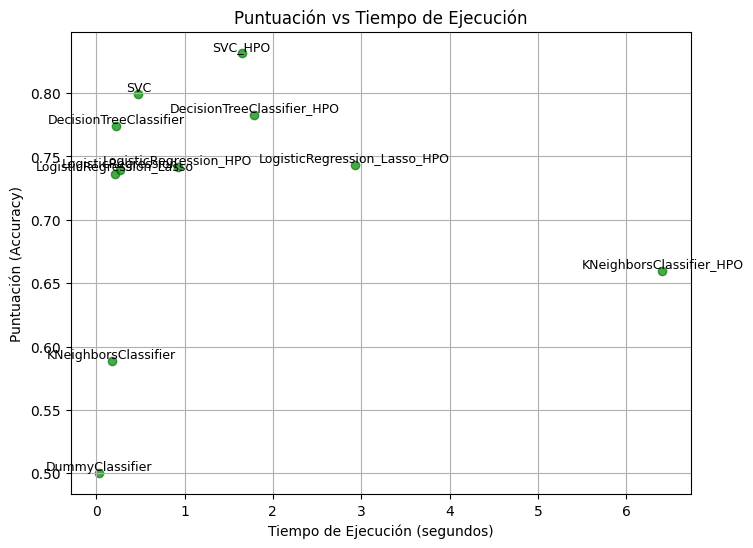

In [425]:
# Listamos los modelos de clasificación
modelos = list(resultados.keys())

# Extraemos puntuaciones y tiempos de ejecución para cada modelo
accuracies = [resultados[modelo]["puntuacion"] for modelo in modelos]
tiempos = [resultados[modelo]["tiempo_ejecucion"] for modelo in modelos]

# Creamos el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(tiempos, accuracies, color='green', alpha=0.7)
plt.title('Puntuación vs Tiempo de Ejecución')
plt.xlabel('Tiempo de Ejecución (segundos)')
plt.ylabel('Puntuación (Accuracy)')
plt.grid(True)

# Ajustamos la posición de las etiquetas de los puntos
for i, modelo in enumerate(modelos):
    plt.text(tiempos[i], accuracies[i], modelo, fontsize=9, ha='center', va='bottom')

# Mostramos el gráfico
plt.show()

Como podemos comprobar, el mejor clasificador obtenido es __SVM con ajuste de hiperparámetros__:

In [426]:
mejor_puntuacion = 0
mejor_modelo = None
tiempo_ejecucion = None
# Iteramos sobre los resultados para encontrar el mejor modelo
for nombre, resultado in resultados.items():
    if resultado['puntuacion'] > mejor_puntuacion:
        mejor_puntuacion = resultado['puntuacion']
        mejor_modelo = nombre
        tiempo_ejecucion = resultado['tiempo_ejecucion']

print(f"El mejor modelo es: {mejor_modelo} con una puntuación de {mejor_puntuacion} y tiempo de ejecución {tiempo_ejecucion}.")

El mejor modelo es: SVC_HPO con una puntuación de 0.8314714876776398 y tiempo de ejecución 1.6471400260925293.


### 6.2. Estimación del rendimiento a futuro del modelo final

A continuación, nos disponemos a realizar la evaluación _outer_ del modelo de clasificación elegido anteriormente. Para ello, llamaremos a la función `predict()` para evaluar el modelo con la partición de test:

In [427]:
from sklearn.metrics import accuracy_score

# Importamos el mejor clasificador
mejor_clasificador = SVC(random_state=42)

# Balanceamos los pesos
mejor_clasificador.set_params(class_weight="balanced")

# Establecemos los hiperparámetros óptimos del clasificador SVM
mejor_clasificador.set_params(C=10, kernel='rbf')

# Creamos la pipeline con el preprocesador y el clasificador
pipeline = Pipeline(steps=[
           ("preprocessor", preprocesador),
           ("classifier", mejor_clasificador)
           ])

# Entrenamos el modelo con el conjunto de entrenamiento
pipeline.fit(X_train, y_train)

# Realizamos la predicción en el conjunto de test
score_test = pipeline.predict(X_test)
print(f"Score de la evaluación outer (conjunto de test): {accuracy_score(y_test, score_test)}")

Score de la evaluación outer (conjunto de test): 0.9612244897959183


### 6.3. Entrenamiento del modelo final

Finalmente, se entrena el modelo final con el dataset completo (train + test), y se extrae al fichero [modelo_final.pkl](modelo_final.pkl) para su importación en el siguiente Jupyter Notebook.

In [ ]:
import joblib
X_final = pd.concat([X_train, X_test])
y_final = pd.concat([y_train, y_test])


pipeline.fit(X_final, y_final)
joblib.dump(pipeline, "modelo_final.pkl")

print("Modelo final entrenado con todos los datos.")

Modelo final entrenado con todos los datos.


### 6.4. Obtención de predicciones (Notebook 2)

Este apartado es el que realizaremos en el segundo notebook de la práctica, llamado P1AA_MF (MF = Modelo Final).

## 7. Tarea de elección abierta

Como tarea de elección abierta, propuesto en el enunciado de la práctica, hemos decidido la evaluación de un modelo de __clasificación RandomForest__ de la misma manera que se han hecho los anteriores.

### 7.1. Uso de RandomForest como clasificador

Para la creación de esta tarea, debemos importar la librería `RandomForestClassifier`:

In [434]:
from sklearn.ensemble import RandomForestClassifier

In [440]:
# Creamos un diccionario para almacenar los resultados de los modelos
resultados_extra = {}

Una vez hecho esto, la tarea se centrará en la comparación de los tiempos de ejecución y scores obtenidos de los modelos simples (KNN y Árboles de Decisión) con éste:

In [441]:
# Definimos los clasificadores
clasificadores_extra = [KNeighborsClassifier(), DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42)]

# Iteramos sobre los clasificadores
for clasificador in clasificadores_extra:
    
    # Configuramos el clasificador para que use pesos balanceados cuando pueda
    if isinstance(clasificador, DecisionTreeClassifier):
           clasificador.set_params(class_weight="balanced")
    elif isinstance(clasificador, RandomForestClassifier):
           clasificador.set_params(class_weight="balanced")      
           
    # Pipeline completo con clasificador
    pipeline = Pipeline(steps=[
           ("preprocessor", preprocesador),
           ("classifier", clasificador)
           ])

    # Medimos el tiempo de entrenamiento del modelo
    start_time = time.time()
    scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='balanced_accuracy')
    end_time = time.time()

    # Imprimimos los resultados
    print("Modelo", clasificador.__class__.__name__)
    print("Puntuación de validación cruzada:", scores.mean())
    print("Tiempo de ejecución:", end_time - start_time, "segundos\n")

    # Almacenamos los resultados en el diccionario
    resultados_extra[clasificador.__class__.__name__] = {
       "modelo": clasificador,
       "puntuacion": scores.mean(),
       "tiempo_ejecucion": end_time - start_time,
       "hiperparametros": None
       }


Modelo KNeighborsClassifier
Puntuación de validación cruzada: 0.5883600917431192
Tiempo de ejecución: 0.16907429695129395 segundos

Modelo DecisionTreeClassifier
Puntuación de validación cruzada: 0.7739504632128081
Tiempo de ejecución: 0.2106616497039795 segundos

Modelo RandomForestClassifier
Puntuación de validación cruzada: 0.7400594756251125
Tiempo de ejecución: 1.386263370513916 segundos



De la misma manera, realizamos el proceso con el ajuste de hiperparámetros (HPO) para cada modelo:

In [442]:
for clasificador in clasificadores_extra:

    # Definimos una pipeline con el preprocesador y el clasificador
    pipeline = Pipeline(steps=[
           ("preprocessor", preprocesador),
           ("classifier", clasificador)
           ])

    # Definimos la rejilla de hiperparámetros para cada clasificador
    if isinstance(clasificador, KNeighborsClassifier):
            param_grid = {
                'classifier__n_neighbors': [3, 5, 7, 9, 11],
                'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
            }
    elif isinstance(clasificador, DecisionTreeClassifier):
            # Configuramos el clasificador para que use pesos balanceados si es un árbol de decisión
            clasificador.set_params(class_weight="balanced")
            param_grid = {
                'classifier__max_depth': [5, 10, 15, None],
                'classifier__min_samples_split': [2, 5, 10],
                'classifier__criterion': ['gini', 'entropy'],
            }
    elif isinstance(clasificador, RandomForestClassifier):
            # Configuramos el clasificador para que use pesos balanceados si es un RandomForestClassifier
            clasificador.set_params(class_weight="balanced")
            param_grid = {
                'classifier__max_depth': [5, 10, 15, None],
                'classifier__min_samples_split': [2, 5, 10],
                'classifier__criterion': ['gini', 'entropy'],
            }

    # Entrenamos el modelo con GridSearchCV para encontrar los mejores hiperparámetros
    grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring='balanced_accuracy')

    # Medimos el tiempo del entrenamiento del modelo
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time()

    # Mostrar los mejores hiperparámetros
    print("Modelo", clasificador.__class__.__name__, "con HPO")
    print("Mejores parámetros:", grid_search.best_params_)
    print("Mejor puntuación:", grid_search.best_score_)
    print("Tiempo de ejecución:", end_time - start_time, "segundos\n")

    # Guardamos el mejor modelo en la instancia del diccionario con HPO
    resultados_extra[clasificador.__class__.__name__+"_HPO"] = {
        "modelo": clasificador,
        "puntuacion": grid_search.best_score_,
        "tiempo_ejecucion": end_time - start_time,
        "hiperparametros": grid_search.best_params_
    }

Modelo KNeighborsClassifier con HPO
Mejores parámetros: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 3}
Mejor puntuación: 0.6595936769203093
Tiempo de ejecución: 6.1014604568481445 segundos

Modelo DecisionTreeClassifier con HPO
Mejores parámetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 15, 'classifier__min_samples_split': 5}
Mejor puntuación: 0.782812218924267
Tiempo de ejecución: 1.8353538513183594 segundos

Modelo RandomForestClassifier con HPO
Mejores parámetros: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_split': 10}
Mejor puntuación: 0.7639031300593633
Tiempo de ejecución: 10.84795069694519 segundos



### 7.2. Evaluación de resultados

Podemos observar que los valores de los mejores hiperparámetros para KNN y árboles de decisión se mantiene igual que en apartados anteriores. No obstante, la puntuación y tiempo de ejecución obtenidos para el clasificador `RandomForest()` no mejoran los resultados.

A continuación, se muestra un plot que resumirá la tarea:

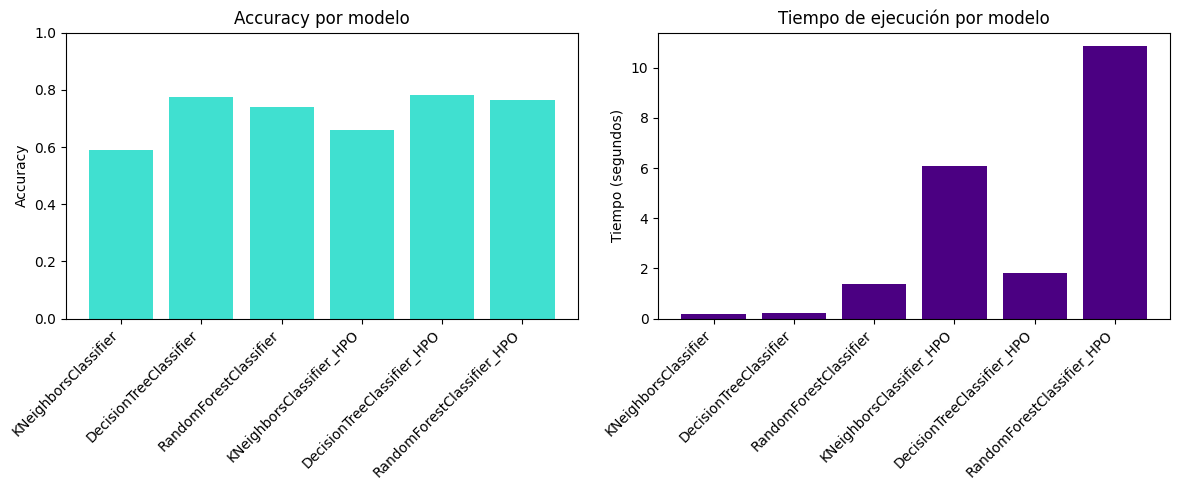

In [449]:
# Listamos los modelos creados
modelos = list(resultados_extra.keys())

# Extraemos las puntuaciones y tiempos de ejecución de cada modelo
accuracies = [resultados_extra[modelo]["puntuacion"] for modelo in modelos]
tiempos = [resultados_extra[modelo]["tiempo_ejecucion"] for modelo in modelos]

# Creamos dos plots: uno para la accuracy y otro para el tiempo de ejecución
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot de scores (accuracies)
axes[0].bar(modelos, accuracies, color='turquoise')
axes[0].set_title('Accuracy por modelo')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0, 1)

# Plot de tiempo de ejecución
axes[1].bar(modelos, tiempos, color='indigo')
axes[1].set_title('Tiempo de ejecución por modelo')
axes[1].set_ylabel('Tiempo (segundos)')

# Ajustamos las etiquetas de los modelos
for ax in axes:
    ax.set_xticks(range(len(modelos)))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Mostramos los plots
plt.tight_layout()
plt.show()

Como podemos observar, la tarea ha resultado ser ineficiente, ya que el modelo de clasificación RandomForest no mejora a los modelos de clasificación simple (y mucho menos mejorará al mejor modelo elegido). Por lo tanto, nuestra tarea adicional acaba aquí.

In [446]:
print("Resultados de los modelos:\n")
for nombre, resultado in resultados_extra.items():
    print(f"Modelo: {nombre}")
    print(f"Puntuación: {resultado['puntuacion']}")
    print(f"Tiempo de ejecución: {resultado['tiempo_ejecucion']} segundos")
    if resultado['hiperparametros']:
        print(f"Hiperparámetros: {resultado['hiperparametros']}")
    print()



Resultados de los modelos:

Modelo: KNeighborsClassifier
Puntuación: 0.5883600917431192
Tiempo de ejecución: 0.16907429695129395 segundos

Modelo: DecisionTreeClassifier
Puntuación: 0.7739504632128081
Tiempo de ejecución: 0.2106616497039795 segundos

Modelo: RandomForestClassifier
Puntuación: 0.7400594756251125
Tiempo de ejecución: 1.386263370513916 segundos

Modelo: KNeighborsClassifier_HPO
Puntuación: 0.6595936769203093
Tiempo de ejecución: 6.1014604568481445 segundos
Hiperparámetros: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 3}

Modelo: DecisionTreeClassifier_HPO
Puntuación: 0.782812218924267
Tiempo de ejecución: 1.8353538513183594 segundos
Hiperparámetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 15, 'classifier__min_samples_split': 5}

Modelo: RandomForestClassifier_HPO
Puntuación: 0.7639031300593633
Tiempo de ejecución: 10.84795069694519 segundos
Hiperparámetros: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier